# Question 1: MNIST with Convolutional Neural Nets

For this question, the goal was to implement three different convolutional neural network architectures and find the best hyperparameters for each.

The following code section loads in the dataset and verifies its size.

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np

#load the data
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

#check if we loaded the data correctly
assert x_train.shape == (60000, 28, 28)
assert x_test.shape == (10000, 28, 28)
assert y_train.shape == (60000,)
assert y_test.shape == (10000,)

11490434/11490434 [==============================] - 0s 0us/step


The following code plots an example image from the MNIST dataset. This is simply to verify that everything was loaded in properly.

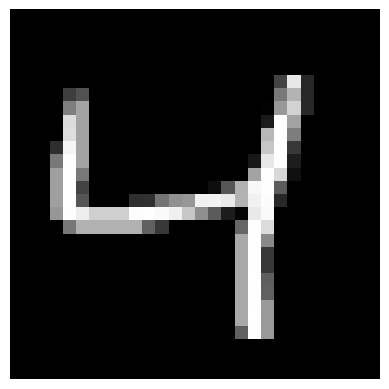

In [2]:
import matplotlib.pyplot as plt

#which image to load
image_index = 2

plt.imshow(x_train[image_index], cmap='gray')
plt.axis('off')
plt.show()


The following code snippet preprocesses the data for training. This includes normalizing the pixel values, giving the images the correct dimensions, and converting the labels to one-hot vectors.

In [3]:
#Data preprocessing

num_classes = 10
input_shape = (28, 28, 1)

#normalize pixels to help with convergence
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
#ensure images have proper shape
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")


#convert class vectors to binary class matrices (one-hot)
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
y_train shape: (60000,)
60000 train samples
10000 test samples


To find the best hyperparameters, I decided to define a range of hyperparameters for the learning rate, number of batches, etc. and iterate through each combination of hyperparameters while saving the validation accuracy for later comparison. This probably isn't the best way of doing it, but it allowed me to work on some other homework (of which I have plenty) while the models were training. The following functions allowed me to iterate through the different models.

Additionally, since the instructions didn't specify the number of kernels to use, I opted to minimize the total to speed up the training. I also chose the keep the last part of each model the same as the model provided in the Keras documentation.

In [4]:
#Define the architectures
def regular_cnn():
    model = keras.Sequential(
        [
            keras.Input(shape=input_shape),
            layers.Conv2D(1, kernel_size=(3, 3), activation="relu"),
            layers.Conv2D(2, kernel_size=(3, 3), activation="relu"),
            layers.Conv2D(3, kernel_size=(3, 3), activation="relu"),
            layers.Conv2D(4, kernel_size=(3, 3), activation="relu"),
            layers.Conv2D(5, kernel_size=(3, 3), activation="relu"),
            layers.Conv2D(6, kernel_size=(3, 3), activation="relu"),
            layers.Conv2D(7, kernel_size=(3, 3), activation="relu"),
            layers.Conv2D(8, kernel_size=(3, 3), activation="relu"),
            layers.Conv2D(9, kernel_size=(3, 3), activation="relu"),
            layers.Conv2D(10, kernel_size=(3, 3), activation="relu"),
            layers.MaxPooling2D(pool_size=(2, 2)),
            layers.Flatten(),
            layers.Dropout(0.5),
            layers.Dense(num_classes, activation="softmax"),
        ]
    )
    return model

def inverted_cnn():
    model = keras.Sequential(
        [
            keras.Input(shape=input_shape),
            layers.Conv2D(10, kernel_size=(3, 3), activation="relu"),
            layers.Conv2D(9, kernel_size=(3, 3), activation="relu"),
            layers.Conv2D(8, kernel_size=(3, 3), activation="relu"),
            layers.Conv2D(7, kernel_size=(3, 3), activation="relu"),
            layers.Conv2D(6, kernel_size=(3, 3), activation="relu"),
            layers.Conv2D(5, kernel_size=(3, 3), activation="relu"),
            layers.Conv2D(4, kernel_size=(3, 3), activation="relu"),
            layers.Conv2D(3, kernel_size=(3, 3), activation="relu"),
            layers.Conv2D(2, kernel_size=(3, 3), activation="relu"),
            layers.Conv2D(1, kernel_size=(3, 3), activation="relu"),
            layers.MaxPooling2D(pool_size=(2, 2)),
            layers.Flatten(),
            layers.Dropout(0.5),
            layers.Dense(num_classes, activation="softmax"),
        ]
    )
    return model

def hourglass_cnn():
    model = keras.Sequential(
        [
            keras.Input(shape=input_shape),
            layers.Conv2D(1, kernel_size=(3, 3), activation="relu"),
            layers.Conv2D(2, kernel_size=(3, 3), activation="relu"),
            layers.Conv2D(3, kernel_size=(3, 3), activation="relu"),
            layers.Conv2D(4, kernel_size=(3, 3), activation="relu"),
            layers.Conv2D(5, kernel_size=(3, 3), activation="relu"),
            layers.Conv2D(6, kernel_size=(3, 3), activation="relu"),
            layers.Conv2D(5, kernel_size=(3, 3), activation="relu"),
            layers.Conv2D(4, kernel_size=(3, 3), activation="relu"),
            layers.Conv2D(3, kernel_size=(3, 3), activation="relu"),
            layers.Conv2D(2, kernel_size=(3, 3), activation="relu"),
            layers.MaxPooling2D(pool_size=(2, 2)),
            layers.Flatten(),
            layers.Dropout(0.5),
            layers.Dense(num_classes, activation="softmax"),
        ]
    )
    return model

The following section of code specifies the other hyperparameters to iterate through. I ran each of these combinations through each architecture for a total of 5x6x3x3 = 270 different models for 10 epochs each. This definitely isn't computationally efficient, but there are some simple ways it could be improved. For instance, some of the models don't stand any chance at being decent, so we could check if the validation accuracy is above a certain threshold after 3 epochs before allowing to continue. I didn't implement this feature, however.


In [5]:
from tensorflow.keras.optimizers import SGD, Adam, RMSprop

#Hyperparameters to check
learning_rates = [0.1, 0.01, 0.001, 0.0001, 0.00001]
batch_sizes = [1024, 512, 256, 128, 64, 32]
optimizers = [SGD, Adam, RMSprop]

#the instructions didn't say to find optimal number of epochs so I'm sticking with 10 for now to test for best validation accuracy after 10 epochs
#if I can find other hyperparameters then I may try to find optimal number of epochs last
epochs = 10

The following code snippet trains the model and then saves the validation accuracy and validation loss to a dictionary which can be searched afterwards to determine the best parameters. Additionally, because Colab may terminate the runtime when idle, I used pickle to save the results dictionary to my Google Drive to be accessed later.

Note that if you're a TA trying to run this for grading purposes, you may want to edit the above code block because it takes a few hours to run through all combinations of the hyperparameters I have laid out.

In [10]:
import pickle
from google.colab import drive

drive.mount('/content/drive')
file_path = '/content/drive/My Drive/AICourse/Assignment3/results.pkl' #to save the results to

#This will store test accuracy results for each model so I can find what hyperparameters worked best in the end
results = {}

#This trains 270 different models and records their info
#This isn't particularly efficient, but it lets me work on other hw in the meantime
for cnn_type in ['regular', 'inverted', 'hourglass']: #3 architectures
    results[cnn_type] = {}
    for optimizer_type in optimizers:   #3 optimizers
        results[cnn_type][optimizer_type] = {}
        for learning_rate in learning_rates:   #5 learning rates
            results[cnn_type][optimizer_type][learning_rate] = {}
            for batch_size in batch_sizes:  #6 batch sizes
                optimizer = optimizer_type(learning_rate=learning_rate)

                #select the appropriate model
                if cnn_type == 'regular':
                    model = regular_cnn()
                elif cnn_type == 'inverted':
                    model = inverted_cnn()
                else:
                    model = hourglass_cnn()

                model.compile(loss="categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

                #this just lets me know how far along the code is
                print(f"Training {cnn_type} CNN with optimizer: {optimizer.__class__.__name__} and learning rate: {learning_rate} and batch size: {batch_size}")

                history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test))

                test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
                print(f"Test accuracy for {cnn_type} CNN: {test_acc * 100:.2f}%")

                #save the results
                results[cnn_type][optimizer_type][learning_rate][batch_size] = [test_acc, test_loss]


#save results dictionary to prevent losing it when runtime ends
with open(file_path, 'wb') as file:
    pickle.dump(results, file)

print("Results saved successfully.")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Training regular CNN with optimizer: SGD and learning rate: 0.1 and batch size: 1024
Epoch 1/10
59/59 [==============================] - 2s 12ms/step - loss: 2.3014 - accuracy: 0.1120 - val_loss: 2.2996 - val_accuracy: 0.1135
Epoch 2/10
59/59 [==============================] - 0s 8ms/step - loss: 2.2994 - accuracy: 0.1117 - val_loss: 2.2958 - val_accuracy: 0.1135
Epoch 3/10
59/59 [==============================] - 0s 8ms/step - loss: 2.2896 - accuracy: 0.1279 - val_loss: 2.2474 - val_accuracy: 0.2142
Epoch 4/10
59/59 [==============================] - 0s 8ms/step - loss: 2.1625 - accuracy: 0.2125 - val_loss: 1.4913 - val_accuracy: 0.5447
Epoch 5/10
59/59 [==============================] - 0s 8ms/step - loss: 1.4153 - accuracy: 0.5135 - val_loss: 0.9475 - val_accuracy: 0.6922
Epoch 6/10
59/59 [==============================] - 0s 8ms/step - loss: 1.0250 - accu

KeyboardInterrupt: ignored

The following code allows me to load the saved results dictionary from my Google Drive.

In [1]:
import pickle
from google.colab import drive

drive.mount('/content/drive')
file_path = '/content/drive/My Drive/AICourse/Assignment3/results.pkl'

#load results dict from file
with open(file_path, 'rb') as file:
    results = pickle.load(file)
print("Results loaded successfully")

Mounted at /content/drive
Results loaded successfully


The following code is to retrieve the best hyperparameters from the results dictionary for each CNN architecture based on the highest validation accuracy.The following table summarizes the optimal hyperparameter results found. Note that because the models are randomly initialized, these parameters may not truly be the most optimal. However, I believe they perform well enough that any difference is negligible.

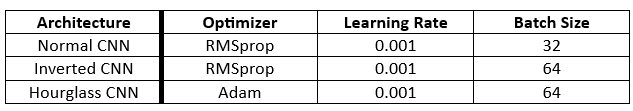


In [11]:
#dictionaries to store best hyperparameters for each architecture
best_params_normal_cnn = {}
best_params_inverted_cnn = {}
best_params_hourglass_cnn = {}

#to keep up with which is highest
highest_val_acc_normal_cnn = 0.0
highest_val_acc_inverted_cnn = 0.0
highest_val_acc_hourglass_cnn = 0.0

#iterate through the dictionary
for cnn_type, cnn_data in results.items():
    for optimizer_type, optimizer_data in cnn_data.items():
        for learning_rate, learning_rate_data in optimizer_data.items():
            for batch_size, acc_list in learning_rate_data.items():
                acc = acc_list[0]  #accuracy is stored in the 0th element

                #update the hyperparameters
                if cnn_type == 'regular':
                    if acc > highest_val_acc_normal_cnn:
                        highest_val_acc_normal_cnn = acc
                        best_params_normal_cnn = {
                            "optimizer_type": optimizer_type,
                            "learning_rate": learning_rate,
                            "batch_size": batch_size,
                        }

                elif cnn_type == 'inverted':
                    if acc > highest_val_acc_inverted_cnn:
                        highest_val_acc_inverted_cnn = acc
                        best_params_inverted_cnn = {
                            "optimizer_type": optimizer_type,
                            "learning_rate": learning_rate,
                            "batch_size": batch_size,
                        }

                elif cnn_type == 'hourglass':
                    if acc > highest_val_acc_hourglass_cnn:
                        highest_val_acc_hourglass_cnn = acc
                        best_params_hourglass_cnn = {
                            "optimizer_type": optimizer_type,
                            "learning_rate": learning_rate,
                            "batch_size": batch_size,
                        }

#print best hyperparameters
print("Highest Validation Accuracy for Normal CNN:", highest_val_acc_normal_cnn)
print("Best Hyperparameters for Normal CNN:", best_params_normal_cnn)
print("Highest Validation Accuracy for Inverted CNN:", highest_val_acc_inverted_cnn)
print("Best Hyperparameters for Inverted CNN:", best_params_inverted_cnn)
print("Highest Validation Accuracy for Hourglass CNN:", highest_val_acc_hourglass_cnn)
print("Best Hyperparameters for Hourglass CNN:", best_params_hourglass_cnn)

Highest Validation Accuracy for Normal CNN: 0.977400004863739
Best Hyperparameters for Normal CNN: {'optimizer_type': <class 'keras.src.optimizers.adam.Adam'>, 'learning_rate': 0.001, 'batch_size': 32}
Highest Validation Accuracy for Inverted CNN: 0.9190999865531921
Best Hyperparameters for Inverted CNN: {'optimizer_type': <class 'keras.src.optimizers.adam.Adam'>, 'learning_rate': 0.001, 'batch_size': 32}
Highest Validation Accuracy for Hourglass CNN: 0.582099974155426
Best Hyperparameters for Hourglass CNN: {'optimizer_type': <class 'keras.src.optimizers.sgd.SGD'>, 'learning_rate': 0.1, 'batch_size': 1024}


The following sections of code are each of the three models with their best hyperparameters hard coded and ready for training. I set the number of epochs to 50 and used early stopping to end training early and revert to the model with the best validation accuracy. The following table shows the optimal hyperparameters for each architecture and includes an estimate for the optimal number of epochs as well as the validation accuracy that was acheived.

I was surprised to see that the hourglass CNN performed on par with (and in this case, slightly better than) the inverted CNN. I had expected the hourglass architecture to perform poorly due to it's unusual shape, but now I think that perhaps its similarity to the normal CNN in it's first few layers is what allows it to perform well enough. Ultimately, I'm very happy with these results since I was able to find hyperparameters that trained each architecture at more than 90% validation accuracy.

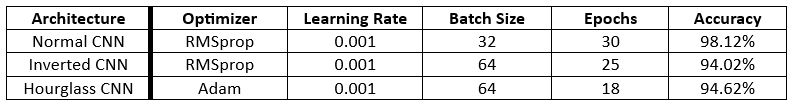

**Regular CNN with optimal hyperparameters**


In [6]:
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

epochs = 50

model = regular_cnn()

model.compile(loss="categorical_crossentropy", optimizer=RMSprop(learning_rate=0.001), metrics=["accuracy"])

early_stopping = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)

print(f"Training Regular CNN with optimizer: RMSprop and learning rate: 0.001 and batch size: 32")

history = model.fit(x_train, y_train, batch_size=32, epochs=epochs, validation_data=(x_test, y_test), callbacks=[early_stopping])

test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)


#plot training and validation loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')

#plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')

plt.tight_layout()
plt.show()

Training Regular CNN with optimizer: RMSprop and learning rate: 0.001 and batch size: 32
Epoch 1/50
1875/1875 [==============================] - 23s 5ms/step - loss: 0.8297 - accuracy: 0.7199 - val_loss: 0.2256 - val_accuracy: 0.9284
Epoch 2/50
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3133 - accuracy: 0.9045 - val_loss: 0.1503 - val_accuracy: 0.9530
Epoch 3/50
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2320 - accuracy: 0.9308 - val_loss: 0.1219 - val_accuracy: 0.9623
Epoch 4/50
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1996 - accuracy: 0.9392 - val_loss: 0.1132 - val_accuracy: 0.9646
Epoch 5/50
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1796 - accuracy: 0.9468 - val_loss: 0.0940 - val_accuracy: 0.9701
Epoch 6/50
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1658 - accuracy: 0.9512 - val_loss: 0.1125 - val_accuracy: 0.9663
Epoch 7/50
1875/1875 [=======================

**Inverted CNN with optimal hyperparameters**

In [8]:
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

epochs = 50

model = inverted_cnn()

model.compile(loss="categorical_crossentropy", optimizer=RMSprop(learning_rate=0.001), metrics=["accuracy"])

early_stopping = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)

print(f"Training Inverted CNN with optimizer: RMSprop and learning rate: 0.001 and batch size: 64")

history = model.fit(x_train, y_train, batch_size=64, epochs=epochs, validation_data=(x_test, y_test), callbacks=[early_stopping])

test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)


#plot training and validation loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')

#plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')

plt.tight_layout()
plt.show()

Training Inverted CNN with optimizer: RMSprop and learning rate: 0.001 and batch size: 64
Epoch 1/50
938/938 [==============================] - 8s 6ms/step - loss: 1.8311 - accuracy: 0.3545 - val_loss: 1.2343 - val_accuracy: 0.6556
Epoch 2/50
938/938 [==============================] - 5s 5ms/step - loss: 1.3095 - accuracy: 0.5653 - val_loss: 0.7391 - val_accuracy: 0.8110
Epoch 3/50
938/938 [==============================] - 5s 5ms/step - loss: 1.1249 - accuracy: 0.6359 - val_loss: 0.6656 - val_accuracy: 0.8376
Epoch 4/50
938/938 [==============================] - 5s 5ms/step - loss: 1.0187 - accuracy: 0.6688 - val_loss: 0.6430 - val_accuracy: 0.8365
Epoch 5/50
938/938 [==============================] - 5s 5ms/step - loss: 0.9500 - accuracy: 0.6934 - val_loss: 0.5326 - val_accuracy: 0.8713
Epoch 6/50
938/938 [==============================] - 5s 5ms/step - loss: 0.8949 - accuracy: 0.7150 - val_loss: 0.4931 - val_accuracy: 0.8886
Epoch 7/50
938/938 [==============================] - 5s 5

**Hourglass CNN with optimal hyperparameters**

In [10]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

epochs = 50

model = hourglass_cnn()

model.compile(loss="categorical_crossentropy", optimizer=Adam(learning_rate=0.001), metrics=["accuracy"])

early_stopping = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)

print(f"Training Hourglass CNN with optimizer: Adam and learning rate: 0.001 and batch size: 64")

history = model.fit(x_train, y_train, batch_size=64, epochs=epochs, validation_data=(x_test, y_test), callbacks=[early_stopping])

test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)


#plot training and validation loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')

#plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')

plt.tight_layout()
plt.show()

Training Hourglass CNN with optimizer: Adam and learning rate: 0.001 and batch size: 64
Epoch 1/50
938/938 [==============================] - 10s 6ms/step - loss: 1.3937 - accuracy: 0.5205 - val_loss: 0.6237 - val_accuracy: 0.8108
Epoch 2/50
938/938 [==============================] - 5s 6ms/step - loss: 0.8709 - accuracy: 0.7268 - val_loss: 0.5082 - val_accuracy: 0.8701
Epoch 3/50
938/938 [==============================] - 5s 6ms/step - loss: 0.7534 - accuracy: 0.7688 - val_loss: 0.4167 - val_accuracy: 0.8857
Epoch 4/50
938/938 [==============================] - 5s 6ms/step - loss: 0.6903 - accuracy: 0.7873 - val_loss: 0.4045 - val_accuracy: 0.8930
Epoch 5/50
938/938 [==============================] - 5s 6ms/step - loss: 0.6461 - accuracy: 0.7995 - val_loss: 0.3757 - val_accuracy: 0.8963
Epoch 6/50
938/938 [==============================] - 5s 6ms/step - loss: 0.6074 - accuracy: 0.8119 - val_loss: 0.3176 - val_accuracy: 0.9133
Epoch 7/50
938/938 [==============================] - 5s 6m

# Question 2

For this question, the goal was to implement the LeNet convolutional neural network using Keras and train it on the CIFAR-10 dataset using the Adam optimizer. Additionally, I had to find the optimal hyperparameters for the LeNet network, and compare it to a feed forward network of similar structure.

The following code loads the dataset and does basic preprocessing such as normalizing the pixel values and creating one-hot vectors for the labels. The assignment states that there are 60,000 training images, but I believe this was a typo as the dataset I used only contained 50,000 training images.

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np

(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

assert x_train.shape == (50000, 32, 32, 3)
assert x_test.shape == (10000, 32, 32, 3)
assert y_train.shape == (50000, 1)
assert y_test.shape == (10000, 1)

#normalize pixel values
x_train, x_test = x_train / 255.0, x_test / 255.0

#convert labels to one-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

num_classes = 10

170498071/170498071 [==============================] - 74s 0us/step


The following code lays out the LeNet model as described in the assignment.

In [8]:
model = keras.Sequential(
    [
        keras.Input(shape=(32, 32, 3)),
        layers.Conv2D(6, kernel_size=(5, 5), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
        layers.Conv2D(16, kernel_size=(5, 5), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
        layers.Conv2D(120, kernel_size=(5, 5), activation="relu"),
        layers.Flatten(),
        layers.Dense(84, activation="relu"),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 28, 28, 6)         456       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 14, 14, 6)         0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 5, 5, 16)          0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 1, 1, 120)         48120     
                                                                 
 flatten_1 (Flatten)         (None, 120)              

The following code will train the LeNet network on the CIFAR-10 dataset for 25 epochs using the Adam optimizer and an optimal learning rate and batch size. Rather than iterating through multiple hyperparameters as before, I found an optimal learning rate and batch size by simply altering the values and comparing the validation accuracy by hand. There are several other learning rates and batch sizes which yielded a comparable validation accuracy after 25 epochs, but a learning rate of 0.001 and batch size of 128 performed slightly better for me. With these parameters, I was able to obtain a validation accuracy of 63.56% after 25 epochs.

In [9]:
from tensorflow.keras.optimizers import Adam

learning_rate = 0.001
batch_size = 128
epochs = 25

model.compile(loss="categorical_crossentropy", optimizer=Adam(learning_rate=learning_rate), metrics=["accuracy"])
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test))

test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)

Epoch 1/25
1563/1563 [==============================] - 10s 6ms/step - loss: 1.6148 - accuracy: 0.4086 - val_loss: 1.5196 - val_accuracy: 0.4651
Epoch 2/25
1563/1563 [==============================] - 9s 5ms/step - loss: 1.3257 - accuracy: 0.5258 - val_loss: 1.2727 - val_accuracy: 0.5407
Epoch 3/25
1563/1563 [==============================] - 9s 6ms/step - loss: 1.2075 - accuracy: 0.5727 - val_loss: 1.1874 - val_accuracy: 0.5759
Epoch 4/25
1563/1563 [==============================] - 9s 6ms/step - loss: 1.1315 - accuracy: 0.5993 - val_loss: 1.1507 - val_accuracy: 0.5910
Epoch 5/25
1563/1563 [==============================] - 9s 6ms/step - loss: 1.0710 - accuracy: 0.6230 - val_loss: 1.1362 - val_accuracy: 0.5928
Epoch 6/25
1563/1563 [==============================] - 9s 6ms/step - loss: 1.0321 - accuracy: 0.6335 - val_loss: 1.1006 - val_accuracy: 0.6086
Epoch 7/25
1563/1563 [==============================] - 9s 6ms/step - loss: 0.9905 - accuracy: 0.6521 - val_loss: 1.1092 - val_accuracy

The following code blocks show the feed forward model which is meant to have a similar structure to the LeNet model, but with only dense layers. Since the assignment didn't mention how to model the max pooling layers in this new network, I simply ignored them. I did, however, leave the 84 neuron dense layer. After training the model for 25 epochs, I was only able to obtain a validation accuracy of 19.48%.

Here are my answers to the assignment questions:

1) The learning rate determines how quickly the model converges. Too small of a learning rate means that the model will take many more epochs to train up to a certain point, but too large of a learning rate causes the training to become unstable and unlikely to converge to a good solution. For instance, in training the LeNet model, 0.00001 was too small and after 25 epochs the validation accuracy was only 39.86%. On the other hand, 0.1 was too large and caused the model to converge to a poor set of parameters with a validation accuracy of only 10%. I found that 0.001 worked best as the learning rate.

2) The batch size determines how long the training takes as well as how noisy it is. Larger batch sizes train quicker and have smoother convergence, but require more memory. Smaller batch sizes take longer to train, have noisier convergences, but may allow the model to better explore the parameter space. I found that a batch size of 128 worked best for the LeNet model. However, other batch sizes such as 512, 256, 64, and 32 performed very similarly.

3) I obtained the my best validation accuracy of 63.56% after training for 25 epochs with the Adam optimizer, a learning rate of 0.001, and a batch size of 128.

4a) The feed forward model performed poorly compared to the LeNet convolutional model. The feed forward model was only able to obtain a validation accuracy of 19.48% after 25 epochs.

4b) By adding up the parameters from each layer, we can see that the feed forward network has 18,438+112+2,040+10,164+850 = 31,604 parameters. The LeNet model has 456+2,416+48,120+10,164+850 = 62,006 parameters. I don't think that the feed forward model is worth it. Even though it has less parameters, its training takes roughly the same amount of time, and its performance is significantly worse than LeNet.

**Feed Forward Model**

In [2]:
from tensorflow.keras.layers import Dense, Flatten

ff_model = keras.Sequential([
    Flatten(input_shape=(32, 32, 3)),
    Dense(6, activation='relu'),
    Dense(16, activation='relu'),
    Dense(120, activation='relu'),
    Dense(84, activation='relu'),
    Dense(10, activation='softmax')
])

ff_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 6)                 18438     
                                                                 
 dense_1 (Dense)             (None, 16)                112       
                                                                 
 dense_2 (Dense)             (None, 120)               2040      
                                                                 
 dense_3 (Dense)             (None, 84)                10164     
                                                                 
 dense_4 (Dense)             (None, 10)                850       
                                                                 
Total params: 31604 (123.45 KB)
Trainable params: 31604 

In [6]:
from tensorflow.keras.optimizers import Adam

learning_rate = 0.001
batch_size = 128
epochs = 25

ff_model.compile(loss="categorical_crossentropy", optimizer=Adam(learning_rate), metrics=["accuracy"])
history = ff_model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test))

test_loss, test_acc = ff_model.evaluate(x_test, y_test, verbose=2)

Epoch 1/25
391/391 [==============================] - 8s 6ms/step - loss: 2.1262 - accuracy: 0.1675 - val_loss: 2.0827 - val_accuracy: 0.1778
Epoch 2/25
391/391 [==============================] - 2s 5ms/step - loss: 2.0738 - accuracy: 0.1868 - val_loss: 2.0600 - val_accuracy: 0.1899
Epoch 3/25
391/391 [==============================] - 2s 5ms/step - loss: 2.0699 - accuracy: 0.1874 - val_loss: 2.0587 - val_accuracy: 0.1932
Epoch 4/25
391/391 [==============================] - 2s 6ms/step - loss: 2.0640 - accuracy: 0.1868 - val_loss: 2.0603 - val_accuracy: 0.1936
Epoch 5/25
391/391 [==============================] - 2s 5ms/step - loss: 2.0596 - accuracy: 0.1873 - val_loss: 2.0564 - val_accuracy: 0.1906
Epoch 6/25
391/391 [==============================] - 2s 5ms/step - loss: 2.0612 - accuracy: 0.1897 - val_loss: 2.0737 - val_accuracy: 0.1844
Epoch 7/25
391/391 [==============================] - 2s 5ms/step - loss: 2.0614 - accuracy: 0.1915 - val_loss: 2.0582 - val_accuracy: 0.1935
Epoch 

# Question 3

In this question, the goal was to calculate the convolution and max pooling output from the given input and kernel values. The input matrix is X and the kernel is f.


```
X = [[7, 5, 0, 0, 3, 2],
     [6, 4, 5, 1, 4, 8],
     [9, 0, 2, 2, 5, 4],
     [6, 3, 4, 7, 9, 8],
     [5, 7, 5, 6, 9, 0],
     [7, 9, 0, 8, 2, 3]]

f = [[1, 0, -1],
     [2, 0, -2],
     [1, 0, -1]]
```

1) The dimensions of the kernel are 6x6x1. The dimensions of the kernel are 3x3x1. The kernel has 10 parameters total which is calculated by multiplying the dimensions of the kernel and adding 1 bias term (3x3x1 + 1 = 10).

2) I calculated the activation map by manually entering numbers into my calculator. First, I started with the kernel aligned to the top left of the input. I then computed the dot product of the elements in that location as 16x1 + 17x2 + 11x1 + -4x-1 + -10x-2 + -17x-1 = 16. Note that there is no need to compute the zero terms since zero multiplied by any other number is equal to zero. I then translated the kernel across the input to compute the other elements of the activation map in the same manner. My answer is shown below.

```
activation_map = [[16, 9, -4, -18],
                  [17, -5, -10, -12],
                  [11, -9, -17, 2],
                  [9, -1, -15, 16]]
```

3) To apply the max pooling operation, I assumed a 2x2 max pooling area and a stride of 2. I simply took the largest value from each 2x2 section of the activation map without overlaps. My answer is shown below.

```
max_pooling = [[17, -4],
               [11, 16]]
```


